In [14]:
# This is a cleaned up solution to the Titanic problem. 
# Some of the strategies used come from the following ressources : 
# - https://www.youtube.com/watch?v=Ea_KAcdv1vs&t=142s
# - https://www.kaggle.com/code/gusthema/titanic-competition-w-tensorflow-decision-forests

# Loading the packages used

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

## Importing the data

In [9]:
train_df = pd.read_csv('dataset/train.csv')
serving_df = pd.read_csv('dataset/test.csv')

## 1. Understanding the nature of the data

We will start by understanding the structure of our data.

In [10]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We verify if there are missing data.

<AxesSubplot:>

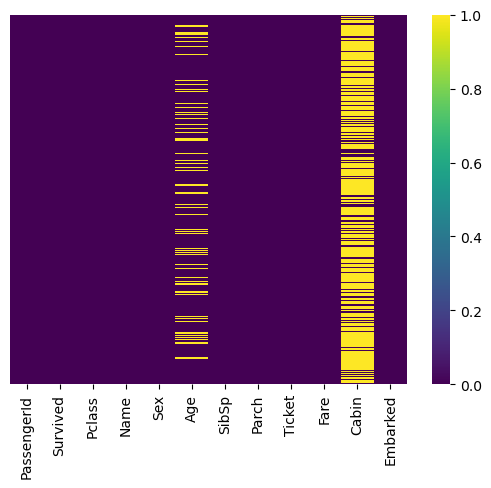

In [16]:
# We can use seaborn to create a simple heatmap to see where the missing data are.
sns.heatmap(train_df.isnull(), yticklabels=False, cmap='viridis')

In [31]:
unique_cabin_count = len(train_df['Cabin'].unique())
non_null_cabin_count = len(train_df[train_df['Cabin'].notnull()]) 

print('There are {} unique cabin values out of the {} values that are not null'.format(unique_cabin_count, non_null_cabin_count))

There are 148 unique cabin values out of the 204 values that are not null


We observe that only the columns 'Age' and 'Cabin' contain missing data.
When it comes to the age, it appears that there are reasonable few ages missing. We should be able to come up with a form of data imputation.
When it comes to the cabin, there are only 204 values that are not null (and out of them, almot 75% are unique values). We will transform this feature into a binary feature indicating whether or not they had an assigned cabin. 

<AxesSubplot:xlabel='Survived', ylabel='count'>

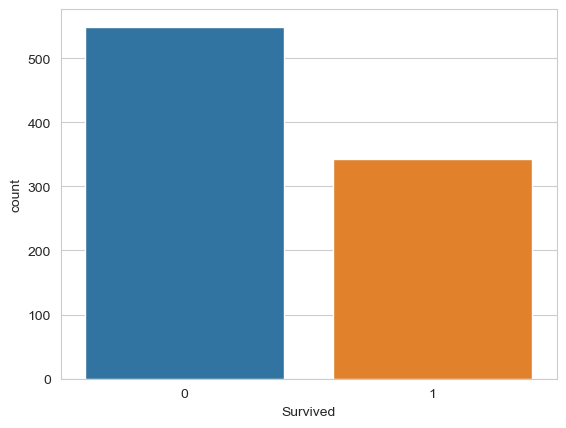

In [54]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train_df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

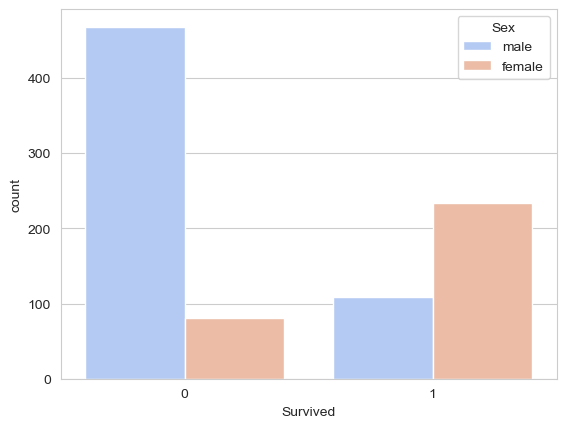

In [66]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train_df, hue='Sex', palette='coolwarm')

We notice that men were much more likely to not have survived.

<AxesSubplot:xlabel='Survived', ylabel='count'>

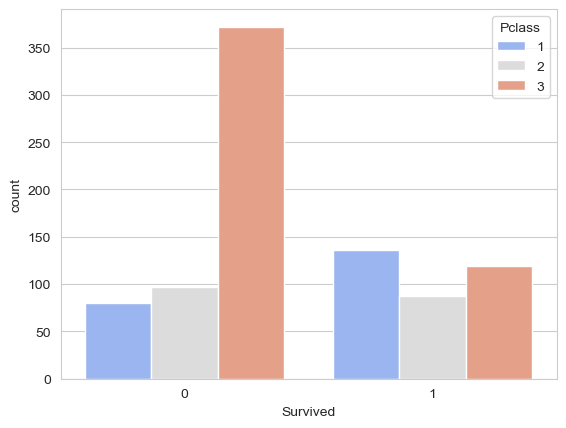

In [67]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train_df, hue='Pclass', palette='coolwarm')

We observe that the passager of class 1 were much more likely to not have survived.

<AxesSubplot:xlabel='Age', ylabel='Count'>

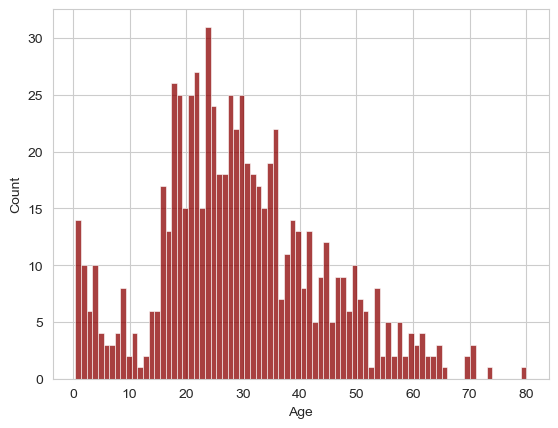

In [75]:
sns.histplot(train_df['Age'].dropna(), kde=False, color='darkred', bins=80)

We observe that the averge age is somewhere between 20 and 30 years old. Based on this distribution, it would not be unreasonable to use this average age to inpute an age where the ages are missing.

<AxesSubplot:xlabel='Survived', ylabel='count'>

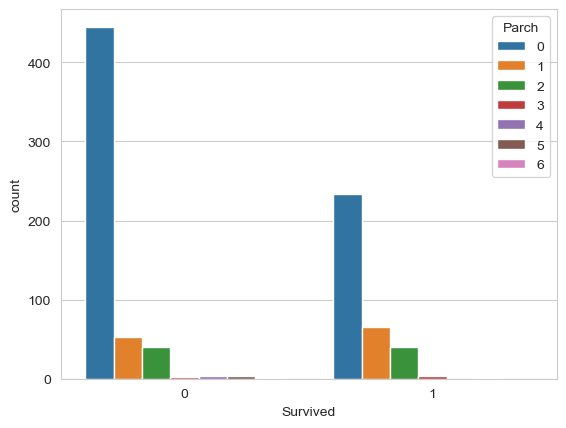

In [90]:
sns.countplot(x='Survived', data=train_df, hue='Parch')

<AxesSubplot:xlabel='Survived', ylabel='count'>

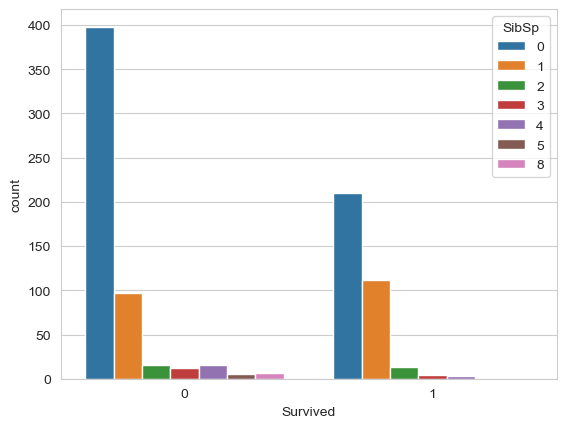

In [91]:
sns.countplot(x='Survived', data=train_df, hue='SibSp')

We do not really get a lot of information from the 'Parch' features and the 'SibSp' feature, aside from observing that the values are generally low (around 0, 1 or 2). Otherwise, the distribution of survival vs death is quite visibly similiar for all the values of these features. That being said, we do see that when people had 3 or more SibSp or Parch, they were more likely to not have survived.

## 2. Data cleaning
## 3. Data exploration
## 4. Feature engineering
## 5. Data processing for model
## 6. Basic model building
## 7. Model Tuning
## 8. Ensemble Model Building
## 9. Results